In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape, LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

# Preprocessing:

## Load Dataset:

In [2]:
(x_train, _),(x_test, _) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Concat train & test data:

In [3]:
# to have more data for train
real_data = np.concatenate([x_train, x_test], axis=0)
real_data.shape

(70000, 28, 28)

## Normalize & Extend(dim) data:

In [4]:
normalized_real_data = np.expand_dims(real_data/127.5 - 1.0, axis=3)

# Define Networks:

In [5]:
def generator(img_shape, zdim):
    """ Generator Network """
    model = Sequential()
    model.add(Dense(128, input_dim=zdim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(img_shape))

    return model


In [6]:
def discriminator(img_shape):
    """ Discriminator Network """
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
      )

    return model

In [7]:
def define_gan(gen, dis):
    """ Generative Adversarial Network """
    model = Sequential()
    model.add(gen)
    model.add(dis)

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam()
      )

    return model

## Set Shapes:

In [8]:
z_dim = 100
img_shape = real_data.shape[1:]
img_shape

(28, 28)

## Call Networks:

In [9]:
dis = discriminator(img_shape)
gen = generator(img_shape, z_dim)

dis.trainable = False
GAN = define_gan(gen, dis)

# Train Model:

## Useful Tools:

In [10]:
def generate_latent_vector(batch_size, zdim):
    """ generate a random latent vector """
    return np.random.normal(0, 1, (batch_size, zdim))

def show_images(gen, zdim):
    """ Show output samples """
    number_of_imgs = 16
    wh = int(np.sqrt(number_of_imgs))

    z = generate_latent_vector(number_of_imgs, zdim)
    gen_imgs = gen.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(wh, wh, figsize=(wh, wh), sharey=True, sharex=True)

    c = 0
    for i in range(wh):
        for j in range(wh):
            axs[i, j].imshow(gen_imgs[i*4 + j], cmap='gray')
            axs[i, j].axis('off')
            c += 1

    plt.tight_layout()
    plt.show()

## Define operation algorithm:

In [11]:
losses = []
accuracies = []
iter_checks = []

def train(r_data, gen, dis, GAN, zdim, iters_range, batch_size, interval):
    r_labels = np.ones((batch_size, 1))
    f_labels = np.zeros((batch_size, 1))

    for iter in range(iters_range):
        print(f"------------------{iter+1}------------------")
        random_index_array = np.random.randint(0, r_data.shape[0], batch_size) # array of random indexs
        r_imgs = r_data[random_index_array]

        z = generate_latent_vector(batch_size, zdim)
        f_imgs = gen.predict(z)

        r_dloss = dis.train_on_batch(r_imgs, r_labels)
        f_dloss = dis.train_on_batch(f_imgs, f_labels)

        dloss, acc = np.add(r_dloss, f_dloss) * 0.5

        z = generate_latent_vector(batch_size, zdim)
        gloss = GAN.train_on_batch(z, r_labels)

        if (iter + 1) % interval == 0:
            losses.append((dloss, gloss))
            accuracies.append(100.0*acc)
            iter_checks.append(iter+1)

            print(
                "%d --> D loss[%f] acc[%.2f] | G loss[%f]"
                % (iter + 1, dloss, 100.0 * acc, gloss)
            )
            show_images(gen, zdim)


## Start training:

------------------1------------------
4/4 [==============================] - 0s 2ms/step
------------------2------------------
4/4 [==============================] - 0s 3ms/step
------------------3------------------
4/4 [==============================] - 0s 2ms/step
------------------4------------------
4/4 [==============================] - 0s 2ms/step
------------------5------------------
4/4 [==============================] - 0s 2ms/step
------------------6------------------
4/4 [==============================] - 0s 2ms/step
------------------7------------------
4/4 [==============================] - 0s 2ms/step
------------------8------------------
4/4 [==============================] - 0s 2ms/step
------------------9------------------
4/4 [==============================] - 0s 2ms/step
------------------10------------------
4/4 [==============================] - 0s 2ms/step
------------------11------------------
4/4 [==============================] - 0s 2ms/step
------------------1

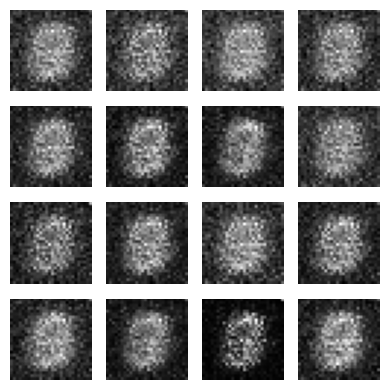

------------------1001------------------
4/4 [==============================] - 0s 2ms/step
------------------1002------------------
4/4 [==============================] - 0s 2ms/step
------------------1003------------------
4/4 [==============================] - 0s 2ms/step
------------------1004------------------
4/4 [==============================] - 0s 2ms/step
------------------1005------------------
4/4 [==============================] - 0s 2ms/step
------------------1006------------------
4/4 [==============================] - 0s 2ms/step
------------------1007------------------
4/4 [==============================] - 0s 2ms/step
------------------1008------------------
4/4 [==============================] - 0s 2ms/step
------------------1009------------------
4/4 [==============================] - 0s 2ms/step
------------------1010------------------
4/4 [==============================] - 0s 2ms/step
------------------1011------------------
4/4 [==============================] - 

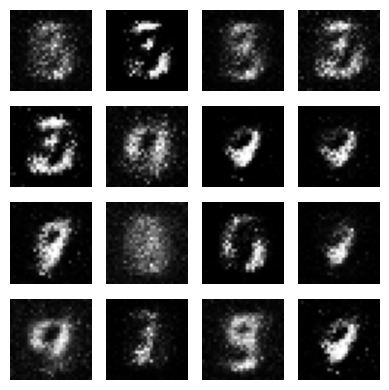

------------------2001------------------
4/4 [==============================] - 0s 2ms/step
------------------2002------------------
4/4 [==============================] - 0s 2ms/step
------------------2003------------------
4/4 [==============================] - 0s 2ms/step
------------------2004------------------
4/4 [==============================] - 0s 2ms/step
------------------2005------------------
4/4 [==============================] - 0s 2ms/step
------------------2006------------------
4/4 [==============================] - 0s 2ms/step
------------------2007------------------
4/4 [==============================] - 0s 2ms/step
------------------2008------------------
4/4 [==============================] - 0s 2ms/step
------------------2009------------------
4/4 [==============================] - 0s 2ms/step
------------------2010------------------
4/4 [==============================] - 0s 2ms/step
------------------2011------------------
4/4 [==============================] - 

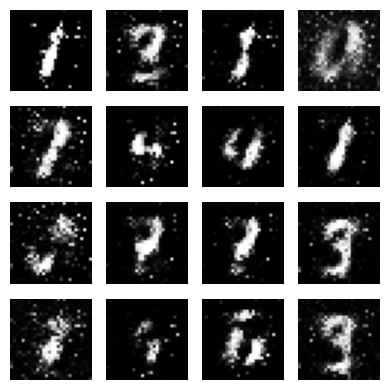

------------------3001------------------
4/4 [==============================] - 0s 2ms/step
------------------3002------------------
4/4 [==============================] - 0s 2ms/step
------------------3003------------------
4/4 [==============================] - 0s 2ms/step
------------------3004------------------
4/4 [==============================] - 0s 2ms/step
------------------3005------------------
4/4 [==============================] - 0s 2ms/step
------------------3006------------------
4/4 [==============================] - 0s 2ms/step
------------------3007------------------
4/4 [==============================] - 0s 2ms/step
------------------3008------------------
4/4 [==============================] - 0s 2ms/step
------------------3009------------------
4/4 [==============================] - 0s 2ms/step
------------------3010------------------
4/4 [==============================] - 0s 2ms/step
------------------3011------------------
4/4 [==============================] - 

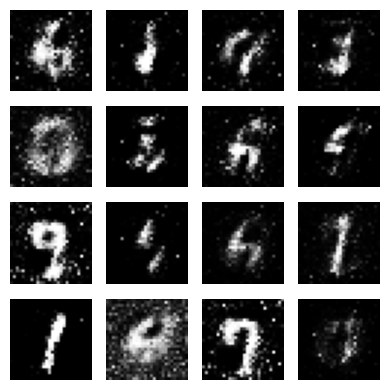

------------------4001------------------
4/4 [==============================] - 0s 2ms/step
------------------4002------------------
4/4 [==============================] - 0s 2ms/step
------------------4003------------------
4/4 [==============================] - 0s 2ms/step
------------------4004------------------
4/4 [==============================] - 0s 2ms/step
------------------4005------------------
4/4 [==============================] - 0s 2ms/step
------------------4006------------------
4/4 [==============================] - 0s 2ms/step
------------------4007------------------
4/4 [==============================] - 0s 2ms/step
------------------4008------------------
4/4 [==============================] - 0s 2ms/step
------------------4009------------------
4/4 [==============================] - 0s 2ms/step
------------------4010------------------
4/4 [==============================] - 0s 2ms/step
------------------4011------------------
4/4 [==============================] - 

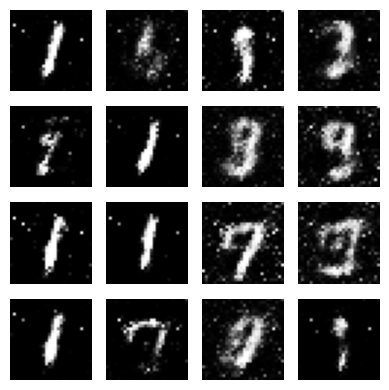

------------------5001------------------
4/4 [==============================] - 0s 2ms/step
------------------5002------------------
4/4 [==============================] - 0s 2ms/step
------------------5003------------------
4/4 [==============================] - 0s 2ms/step
------------------5004------------------
4/4 [==============================] - 0s 2ms/step
------------------5005------------------
4/4 [==============================] - 0s 2ms/step
------------------5006------------------
4/4 [==============================] - 0s 2ms/step
------------------5007------------------
4/4 [==============================] - 0s 2ms/step
------------------5008------------------
4/4 [==============================] - 0s 2ms/step
------------------5009------------------
4/4 [==============================] - 0s 2ms/step
------------------5010------------------
4/4 [==============================] - 0s 2ms/step
------------------5011------------------
4/4 [==============================] - 

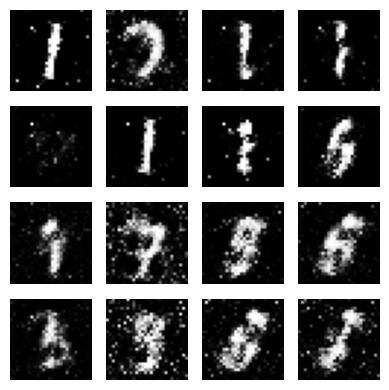

------------------6001------------------
4/4 [==============================] - 0s 2ms/step
------------------6002------------------
4/4 [==============================] - 0s 2ms/step
------------------6003------------------
4/4 [==============================] - 0s 2ms/step
------------------6004------------------
4/4 [==============================] - 0s 2ms/step
------------------6005------------------
4/4 [==============================] - 0s 2ms/step
------------------6006------------------
4/4 [==============================] - 0s 2ms/step
------------------6007------------------
4/4 [==============================] - 0s 2ms/step
------------------6008------------------
4/4 [==============================] - 0s 2ms/step
------------------6009------------------
4/4 [==============================] - 0s 2ms/step
------------------6010------------------
4/4 [==============================] - 0s 2ms/step
------------------6011------------------
4/4 [==============================] - 

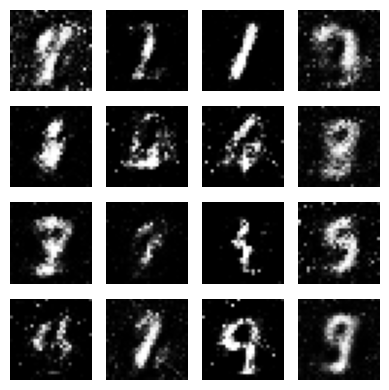

------------------7001------------------
4/4 [==============================] - 0s 2ms/step
------------------7002------------------
4/4 [==============================] - 0s 2ms/step
------------------7003------------------
4/4 [==============================] - 0s 2ms/step
------------------7004------------------
4/4 [==============================] - 0s 2ms/step
------------------7005------------------
4/4 [==============================] - 0s 2ms/step
------------------7006------------------
4/4 [==============================] - 0s 2ms/step
------------------7007------------------
4/4 [==============================] - 0s 2ms/step
------------------7008------------------
4/4 [==============================] - 0s 2ms/step
------------------7009------------------
4/4 [==============================] - 0s 2ms/step
------------------7010------------------
4/4 [==============================] - 0s 2ms/step
------------------7011------------------
4/4 [==============================] - 

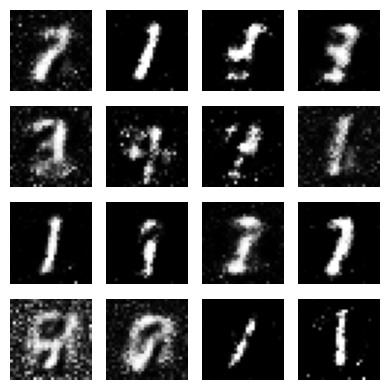

------------------8001------------------
4/4 [==============================] - 0s 2ms/step
------------------8002------------------
4/4 [==============================] - 0s 2ms/step
------------------8003------------------
4/4 [==============================] - 0s 2ms/step
------------------8004------------------
4/4 [==============================] - 0s 2ms/step
------------------8005------------------
4/4 [==============================] - 0s 2ms/step
------------------8006------------------
4/4 [==============================] - 0s 2ms/step
------------------8007------------------
4/4 [==============================] - 0s 2ms/step
------------------8008------------------
4/4 [==============================] - 0s 2ms/step
------------------8009------------------
4/4 [==============================] - 0s 2ms/step
------------------8010------------------
4/4 [==============================] - 0s 2ms/step
------------------8011------------------
4/4 [==============================] - 

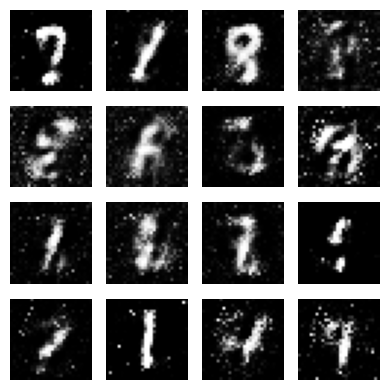

------------------9001------------------
4/4 [==============================] - 0s 2ms/step
------------------9002------------------
4/4 [==============================] - 0s 2ms/step
------------------9003------------------
4/4 [==============================] - 0s 2ms/step
------------------9004------------------
4/4 [==============================] - 0s 2ms/step
------------------9005------------------
4/4 [==============================] - 0s 2ms/step
------------------9006------------------
4/4 [==============================] - 0s 2ms/step
------------------9007------------------
4/4 [==============================] - 0s 2ms/step
------------------9008------------------
4/4 [==============================] - 0s 2ms/step
------------------9009------------------
4/4 [==============================] - 0s 2ms/step
------------------9010------------------
4/4 [==============================] - 0s 2ms/step
------------------9011------------------
4/4 [==============================] - 

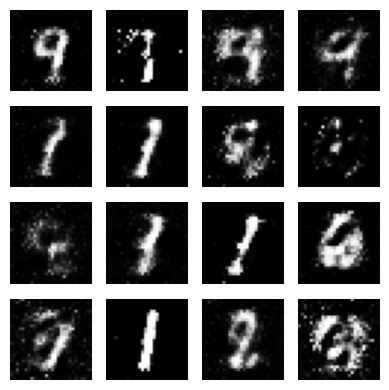

In [12]:
train(normalized_real_data, gen, dis, GAN, z_dim, 10000, 128, 1000)

# ***FIN :3***